# Evaluation Project - 6
Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


 Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('Loan_Status') data type indicates that dependent variable data is categorical in nature.

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Checking Null/Missing values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History columns have null values.

# Filling Categorical Columns missing values with mode

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

# Filling Continuous Columns missing values with mean

In [9]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Statistical Summary

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


 A higher std than mean in ApplicantIncome and CoapplicantIncome columns indicates skewness.

There is a huge difference between 75% and max in ApplicantIncome,CoapplicantIncome and LoanAmount, indicating presence of outliers.

# Checking for Unique values

In [12]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

 Gender,Married,Education,Self_Employed,Loan_Status each have 2 unique elements.

Dependents has 4 unique elements.

Credit_History,Property Area has 3 unique elements.

# EXPLORATORY DATA ANALYSIS

# Analysing Target column

In [13]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

 There are 2 unique categorical values.

Class 'Y' : Has 422 values

'N' : Has 192 values

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

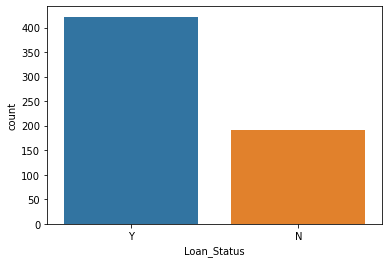

In [14]:
sns.countplot(df['Loan_Status'])

 Loan of the applicants have more approved than rejected in this dataset.

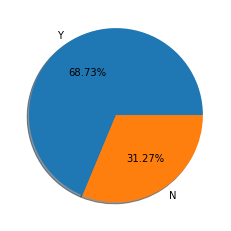

In [15]:
labels = 'Y','N'
fig, ax = plt.subplots()
ax.pie(df['Loan_Status'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

 Class

'Y' : Has 68.73% of total values

'N' : Has 31.27% of total values

Classes are imbalanced.

# Analysing Feature columns Catergorical Classes

<AxesSubplot:xlabel='Gender', ylabel='count'>

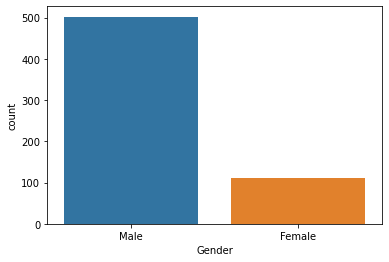

In [16]:
sns.countplot(df['Gender'])

 There are more Male Applicants than Female Applicants.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

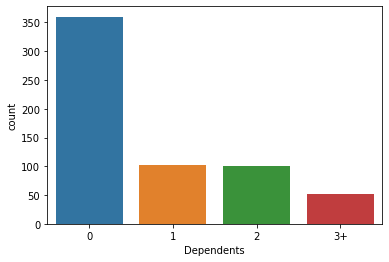

In [17]:
sns.countplot(df['Dependents'])

 Most applicants have no dependents to support.

<AxesSubplot:xlabel='Education', ylabel='count'>

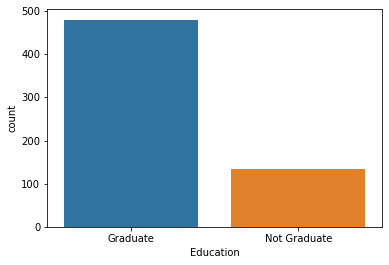

In [18]:
sns.countplot(df['Education'])

 Most applicants are Graduates.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

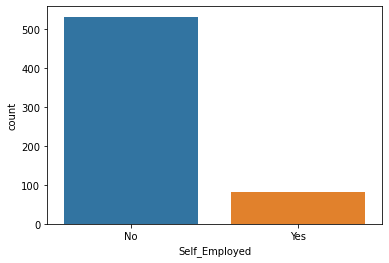

In [19]:
sns.countplot(df['Self_Employed'])

 Most applicants are not Self Employed.

In [20]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

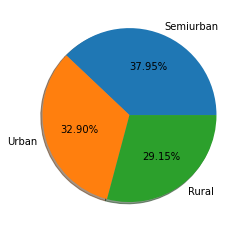

In [21]:
labels = 'Semiurban','Urban','Rural'
fig, ax = plt.subplots()
ax.pie(df['Property_Area'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

 37.95% applicants are from Semiurban, while 32.90% of applicants are from Urban and 29.15% are from Rural areas.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

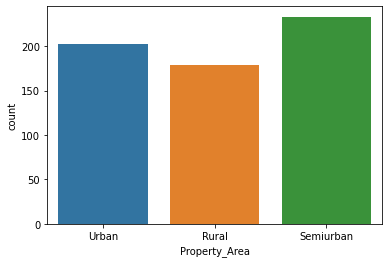

In [22]:
sns.countplot(df['Property_Area'])

 Loan of semiurban applicants have accepted the most in the dataset.

Loan of rural applicants have rejected the most in the dataset.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

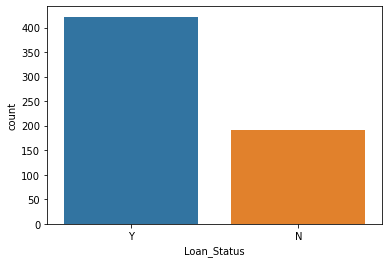

In [23]:
sns.countplot(df['Loan_Status'])

 More Loans have approved than rejected.

# Analysing Feature columns with Continuous Data

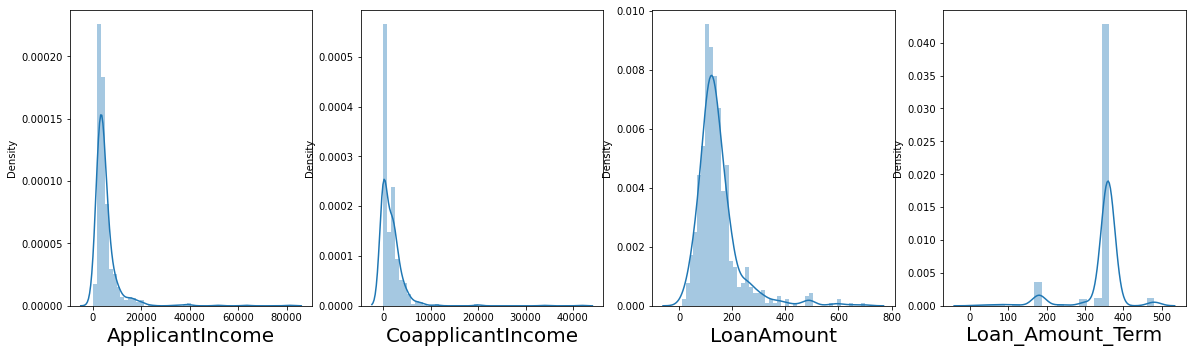

In [24]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 Data distributions are skewed

In [25]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
dtype: float64

# 'Loan_Status' vs Continuous/Discrete Data Columns

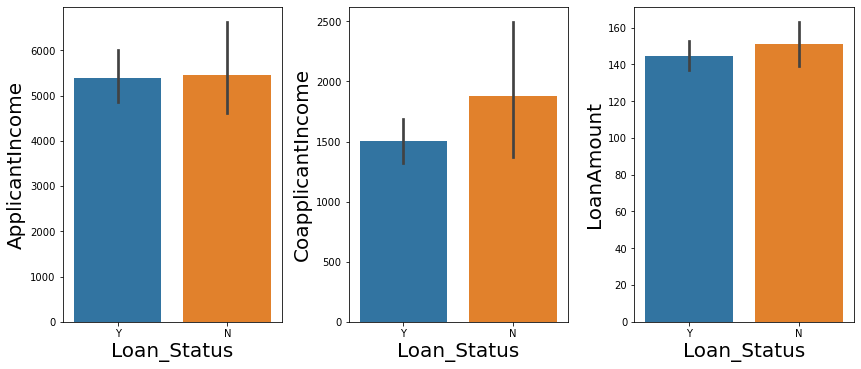

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['Loan_Status']
X = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Loan_Status',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

 Following observations can be made from above graphs:

Applicant income doesnt seem to contribute significantly to loan approval.

Loan rejection is high for higher Coapplicant Income.

LoanAmount doesn't seem to have a strong correlation with Loan Status.

# 'Loan_Status' vs Categorical Data Columns

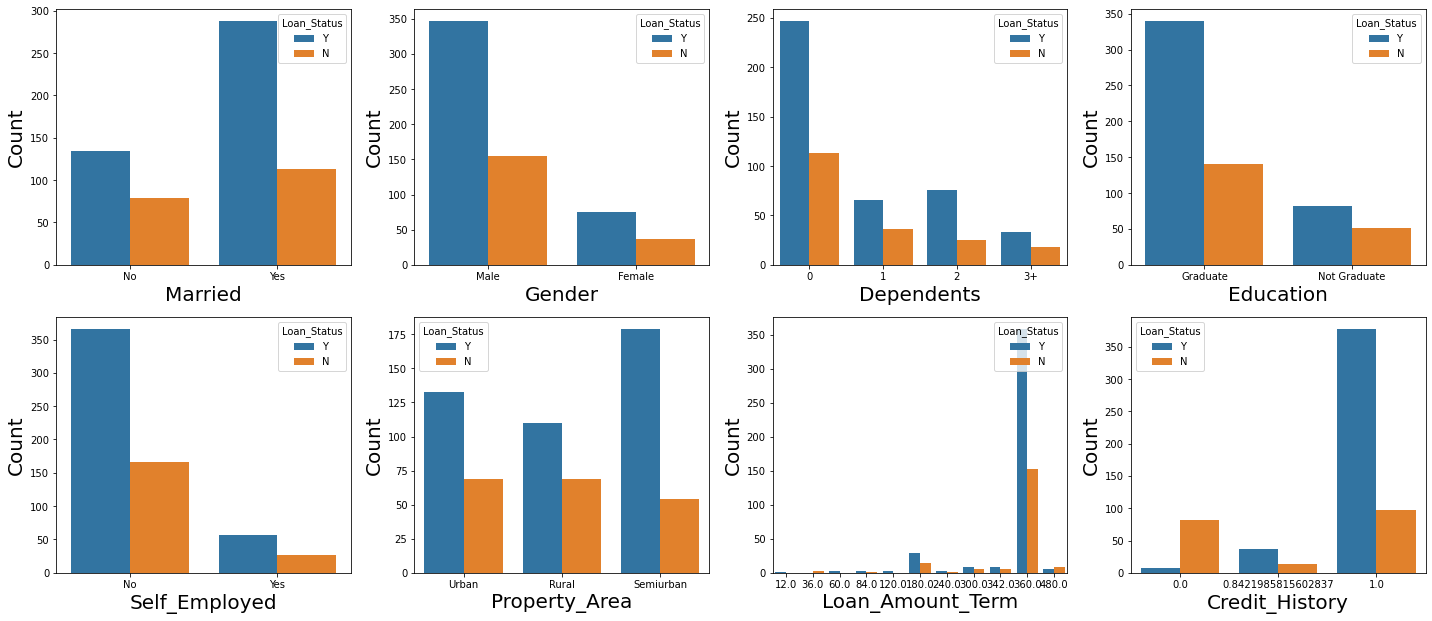

In [27]:
plt.figure(figsize=(20,21),facecolor='white')
plotnum=1
X = df[['Married','Gender','Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term','Credit_History']]
y = df['Loan_Status']
for col in X:
    if plotnum<=23:
        plt.subplot(5,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

 Following observations can be made from above graphs:

Married applicants have higher loan approval.

More Male applicants get loan approval than Female applicants. This may also be due to the fact that there are more male applicants than female applicants.

Applicants with 0 dependents have highest loan approval.

Graduates have higher loan approval.

Applicants who are not self employed have higher loan approval.

Applicants from semi urban areas have highest loan approval.

Highest loan approval is for 360.

Applicants with Credit History of 1.0 has highest loan approval.

In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Dropping columns 'Loan_ID ', as it isnot required for predicting values of target column

In [29]:
df.drop(columns = ['Loan_ID'],inplace=True)
df.shape

(614, 12)

# Checking for Outliers

In [30]:
X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

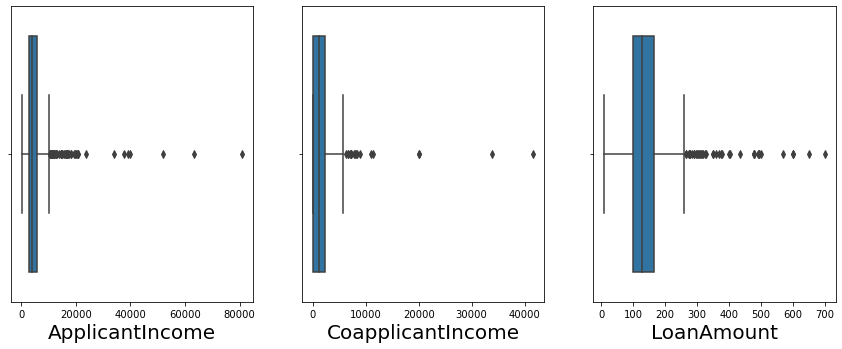

In [31]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 All columns have a lot of outliers.

# Removing Outliers using Z score Method

In [33]:
df2 = X[['ApplicantIncome','CoapplicantIncome','LoanAmount']].copy()
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,146.412162
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000
...,...,...,...
609,2900,0.0,71.000000
610,4106,0.0,40.000000
611,8072,240.0,253.000000
612,7583,0.0,187.000000


In [34]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value
df3.shape

(589, 3)

In [35]:
df2.shape

(614, 3)

# % DATA LOSS

In [36]:
loss=(614-589)/614 * 100
loss

4.071661237785016

 4.071% data loss is within acceptable range

In [37]:
dropindx = X.index.difference(df3.index)
dropindx

Int64Index([  9, 126, 130, 155, 171, 177, 183, 185, 278, 308, 333, 369, 402,
            409, 417, 432, 443, 487, 506, 523, 525, 561, 581, 600, 604],
           dtype='int64')

In [38]:
df.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [39]:
df.reset_index(drop=True,inplace = True)
df.shape

(589, 12)

# Checking for Skewness in Data

In [40]:
X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

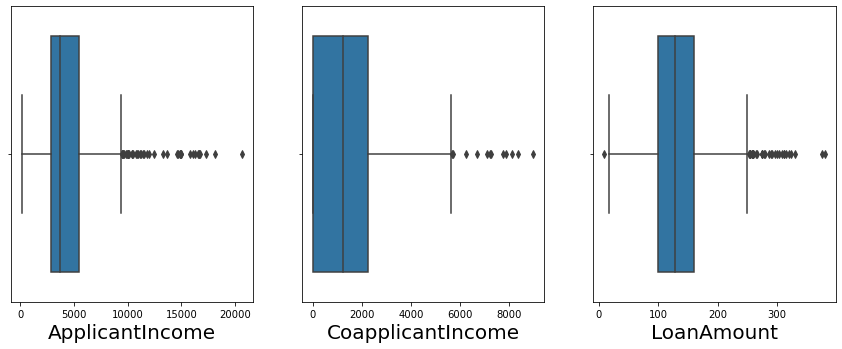

In [41]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 Some outliers have been removed.

# Checking for Skewness

In [42]:
X.skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -2.433130
Credit_History      -1.953298
dtype: float64

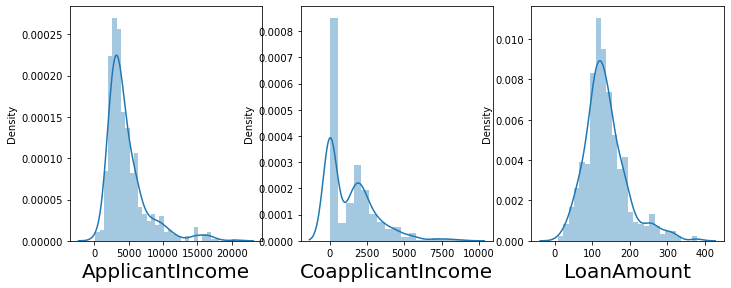

In [43]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 Considerable skewness exists in the data distributions.

# Reducing skewness further using PowerTransformer

In [44]:
from sklearn.preprocessing import PowerTransformer

In [45]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [46]:
df4 = X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [47]:
transformed= powtrans.fit_transform(df4)

In [48]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [49]:
transformed.skew()

ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060143
dtype: float64

In [50]:
transformed.index = X.index

In [51]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = transformed[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [52]:
df.skew()

ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060143
Loan_Amount_Term    -2.433130
Credit_History      -1.953298
dtype: float64

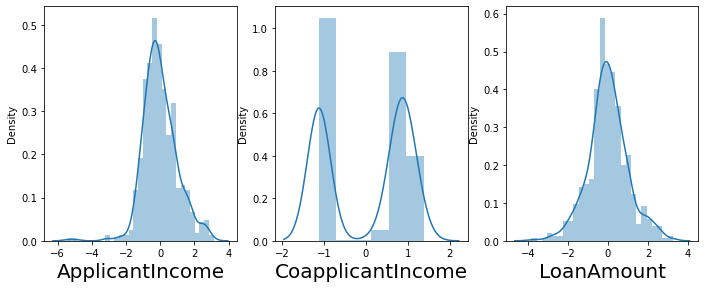

In [53]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 Distributions look much more Normalised.

# Encoding the categorical Feature Columns

In [55]:
X[['Gender','Married','Education','Self_Employed','Property_Area']].nunique()

Gender           2
Married          2
Education        2
Self_Employed    2
Property_Area    3
dtype: int64

# Encoding using get_dummies()

In [56]:
dumm = pd.get_dummies(X[['Gender','Married','Education','Self_Employed','Property_Area']],drop_first = False)
dumm

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
584,1,0,1,0,1,0,1,0,1,0,0
585,0,1,0,1,1,0,1,0,1,0,0
586,0,1,0,1,1,0,1,0,0,0,1
587,0,1,0,1,1,0,1,0,0,0,1


In [57]:
df = df.join(dumm)

In [58]:
df.drop(columns = ['Gender','Married','Education','Self_Employed','Property_Area'],axis = 1, inplace = True)

# Encoding the 'Dependents' Column

In [59]:
df['Dependents'].value_counts()

0     350
2      98
1      96
3+     45
Name: Dependents, dtype: int64

In [60]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

# Encoding the Label Column

In [61]:
df['Loan_Status'] = df.Loan_Status.map({'N':0,'Y':1}) #'No' = 1 and 'Yes' = 0
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.688986,-1.119438,0.316179,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,1,0.239843,0.748807,-0.012325,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,0,-0.525799,-1.119438,-1.391277,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,0,-0.791841,0.899419,-0.163769,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,0,0.736280,-1.119438,0.222283,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0,-0.586262,-1.119438,-1.257035,360.0,1.0,1,1,0,1,0,1,0,1,0,1,0,0
585,3,0.039489,-1.119438,-2.209951,180.0,1.0,1,0,1,0,1,1,0,1,0,1,0,0
586,1,1.291744,0.180599,1.855658,360.0,1.0,1,0,1,0,1,1,0,1,0,0,0,1
587,2,1.173950,-1.119438,0.962614,360.0,1.0,1,0,1,0,1,1,0,1,0,0,0,1


# Finding Correlation

In [62]:
l_corr = df.corr()
l_corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Dependents,1.000000,0.105559,0.001199,0.128371,-0.088304,-0.014654,0.021937,-0.184580,0.184580,-0.333887,0.333887,-0.068588,0.068588,-0.055481,0.055481,-0.009055,0.007249,0.001300
ApplicantIncome,0.105559,1.000000,-0.359986,0.438097,-0.040969,0.032011,-0.003320,-0.058502,0.058502,0.022535,-0.022535,0.168924,-0.168924,-0.215911,0.215911,0.022144,-0.015138,-0.005851
CoapplicantIncome,0.001199,-0.359986,1.000000,0.196155,0.012664,0.000218,0.080277,-0.230767,0.230767,-0.334429,0.334429,-0.037050,0.037050,0.100679,-0.100679,0.066906,-0.014975,-0.049398
LoanAmount,0.128371,0.438097,0.196155,1.000000,0.094820,-0.012470,-0.039999,-0.158553,0.158553,-0.173314,0.173314,0.131758,-0.131758,-0.105670,0.105670,0.086257,-0.001672,-0.081869
Loan_Amount_Term,-0.088304,-0.040969,0.012664,0.094820,1.000000,-0.007756,-0.021418,0.084495,-0.084495,0.100764,-0.100764,0.079807,-0.079807,0.054191,-0.054191,0.029061,0.062492,-0.092600
Credit_History,-0.014654,0.032011,0.000218,-0.012470,-0.007756,1.000000,0.555902,-0.016096,0.016096,-0.012408,0.012408,0.078559,-0.078559,0.012904,-0.012904,-0.018836,0.046829,-0.030032
Loan_Status,0.021937,-0.003320,0.080277,-0.039999,-0.021418,0.555902,1.000000,-0.021942,0.021942,-0.095124,0.095124,0.092852,-0.092852,0.016617,-0.016617,-0.101187,0.133422,-0.039514
Gender_Female,-0.184580,-0.058502,-0.230767,-0.158553,0.084495,-0.016096,-0.021942,1.000000,-1.000000,0.374745,-0.374745,0.050036,-0.050036,0.000841,-0.000841,-0.076936,0.107506,-0.036292
Gender_Male,0.184580,0.058502,0.230767,0.158553,-0.084495,0.016096,0.021942,-1.000000,1.000000,-0.374745,0.374745,-0.050036,0.050036,-0.000841,0.000841,0.076936,-0.107506,0.036292
Married_No,-0.333887,0.022535,-0.334429,-0.173314,0.100764,-0.012408,-0.095124,0.374745,-0.374745,1.000000,-1.000000,0.015846,-0.015846,-0.004453,0.004453,0.011678,-0.004727,-0.006443


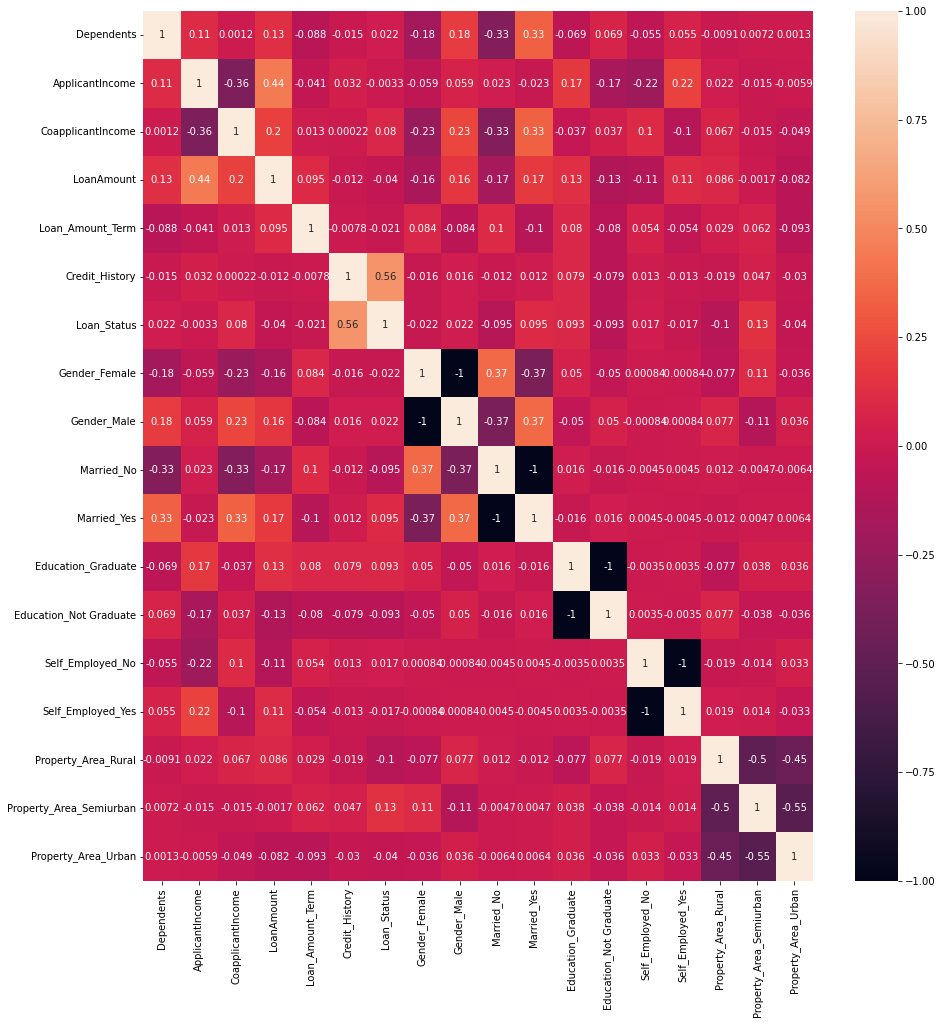

In [63]:
plt.figure(figsize=(15,16))
sns.heatmap(l_corr,annot=True,)
plt.show()

# Visualizing correlation of feature columns with label column

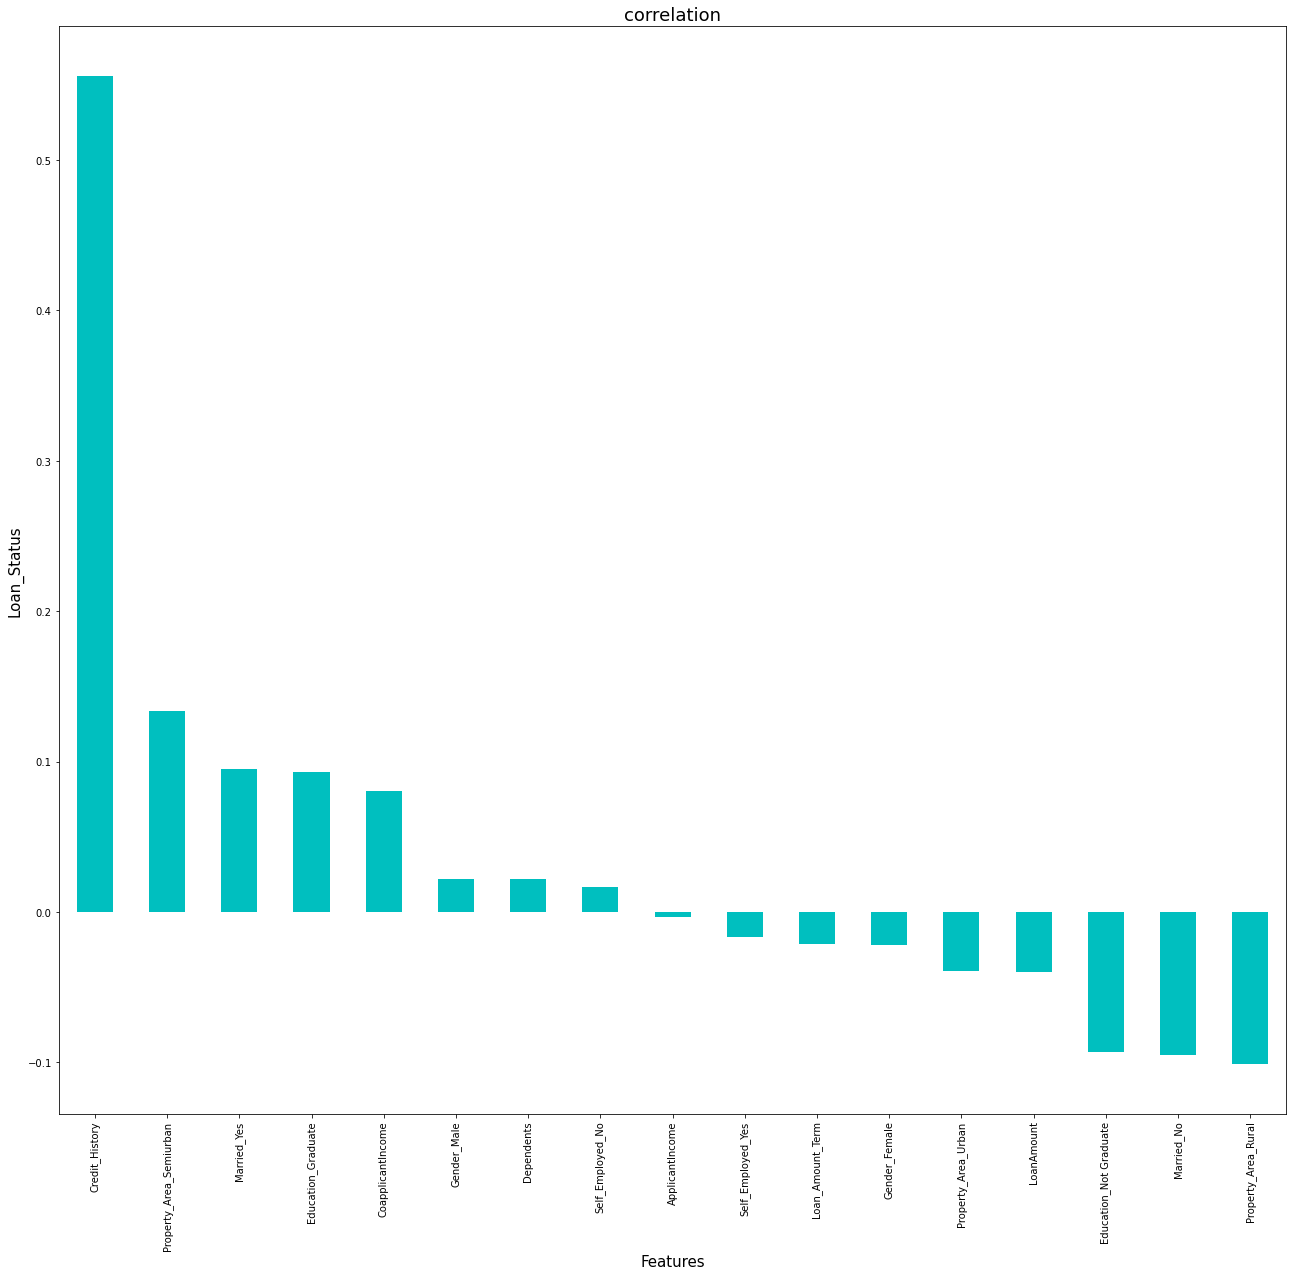

In [64]:
plt.figure(figsize = (22,20))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Loan_Status',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

 Credit_History, Property_Area_Semiurban,Married_Yes,Education_Graduate have the highest positive correlation with Loan_Status, while Propert_Area_Rural,Married_No,Education_Not Graduate have the highest negative correlation with Loan_Status.

In [66]:
X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

# Feature Selection

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [69]:
scaled_X

array([[-0.72840172,  0.68898634, -1.11943846, ..., -0.64487626,
        -0.77775615,  1.42691362],
       [ 0.27634913,  0.23984329,  0.74880747, ...,  1.5506851 ,
        -0.77775615, -0.70081327],
       [-0.72840172, -0.52579862, -1.11943846, ..., -0.64487626,
        -0.77775615,  1.42691362],
       ...,
       [ 0.27634913,  1.29174432,  0.18059936, ..., -0.64487626,
        -0.77775615,  1.42691362],
       [ 1.28109999,  1.17394957, -1.11943846, ..., -0.64487626,
        -0.77775615,  1.42691362],
       [-0.72840172,  0.23984329, -1.11943846, ..., -0.64487626,
         1.28575004, -0.70081327]])

# Checking for Multicollinearity using Variance Inflation Factor

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif = pd.DataFrame()

In [72]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [73]:
vif

,Features,vif
0,Dependents,1.174803
1,ApplicantIncome,1.768051
2,CoapplicantIncome,1.591766
3,LoanAmount,1.572440
4,Loan_Amount_Term,1.058038
5,Credit_History,1.012047
6,Gender_Female,inf
7,Gender_Male,inf
8,Married_No,inf
9,Married_Yes,inf


 There is no Multicollinearity

# Principle Component Analysis

In [74]:
from sklearn.decomposition import PCA

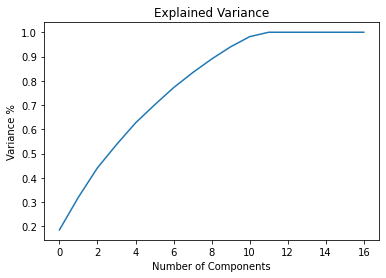

In [75]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

# 12 components explain around 95% variance in Data

In [76]:
pca = PCA(n_components=11)
new_comp = pca.fit_transform(scaled_X)
principle_x=pd.DataFrame(new_comp,columns=np.arange(11))
principle_x

,0,1,2,3,4,5,6,7,8,9,10
0,1.319626,0.494487,-0.820053,-2.167623,0.338706,-1.502966,-0.651014,-0.402915,-0.582214,-0.046975,-0.062896
1,-1.395813,0.048875,-0.822974,-0.348179,-1.590798,0.792488,0.310218,0.704060,-0.144280,-0.345199,-0.077908
2,-0.374366,2.340480,1.475442,-1.028259,2.135793,1.572572,-1.702704,0.467914,-0.224739,-1.423254,-1.309319
3,-1.358301,-2.346297,1.116156,-0.678029,1.104360,0.260940,-0.262024,-0.929804,-1.468794,0.229090,-0.681036
4,1.335165,0.487220,-0.812734,-2.175646,0.357948,-1.509650,-0.661699,-0.364512,-0.561860,-0.077534,-0.090456
...,...,...,...,...,...,...,...,...,...,...,...
584,3.775428,-0.505549,-0.313542,-0.412002,-1.262210,1.337225,0.701256,1.360683,0.067563,-0.593697,-0.175293
585,-1.258738,-0.252955,-0.036391,-0.756733,0.090614,0.097466,0.903562,4.024251,1.812890,-0.770608,0.722517
586,-1.482446,1.064114,-1.285035,-1.160934,0.523162,-0.697201,1.125716,-0.993620,-1.186113,0.443447,-0.090689
587,-1.234493,1.035732,-1.027834,-1.255275,1.018765,-1.159466,1.473674,-0.094947,-0.604449,-0.811965,0.057198


# Selecting Kbest Features

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k = 17)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [78]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(17,'Score'))

                    Feature       Score
5            Credit_History  262.526492
15  Property_Area_Semiurban   10.638798
14      Property_Area_Rural    6.072342
9               Married_Yes    5.359961
8                Married_No    5.359961
11   Education_Not Graduate    5.104883
10       Education_Graduate    5.104883
2         CoapplicantIncome    3.807431
3                LoanAmount    0.940656
16      Property_Area_Urban    0.917930
7               Gender_Male    0.282758
6             Gender_Female    0.282758
0                Dependents    0.282620
4          Loan_Amount_Term    0.269388
12         Self_Employed_No    0.162130
13        Self_Employed_Yes    0.162130
1           ApplicantIncome    0.006468


In [79]:
x_best = X.drop(columns=['ApplicantIncome','Self_Employed_Yes','Self_Employed_No','Dependents']).copy()
x_best

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.119438,0.316179,360.0,1.0,0,1,1,0,1,0,0,0,1
1,0.748807,-0.012325,360.0,1.0,0,1,0,1,1,0,1,0,0
2,-1.119438,-1.391277,360.0,1.0,0,1,0,1,1,0,0,0,1
3,0.899419,-0.163769,360.0,1.0,0,1,0,1,0,1,0,0,1
4,-1.119438,0.222283,360.0,1.0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,-1.119438,-1.257035,360.0,1.0,1,0,1,0,1,0,1,0,0
585,-1.119438,-2.209951,180.0,1.0,0,1,0,1,1,0,1,0,0
586,0.180599,1.855658,360.0,1.0,0,1,0,1,1,0,0,0,1
587,-1.119438,0.962614,360.0,1.0,0,1,0,1,1,0,0,0,1


In [80]:
scaled_x_best = scaler.fit_transform(x_best)

# Classification Model Building

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Finding the best random state`

In [82]:
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i,stratify = y)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8524590163934426 on random_state: 56


In [83]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, stratify = y,random_state = 56) #since class imbalance exists

In [84]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [87]:
RFC = RandomForestClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

# Training the Models

In [88]:
RFC.fit(x_train,y_train)
adbc.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

 All Models have been trained

# Logistic Regression Model Accuracy

In [89]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [90]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[ 32,  25],
       [  2, 124]], dtype=int64)

In [91]:
print(accu)

              precision    recall  f1-score   support

           0       0.94      0.56      0.70        57
           1       0.83      0.98      0.90       126

    accuracy                           0.85       183
   macro avg       0.89      0.77      0.80       183
weighted avg       0.87      0.85      0.84       183



# Random Forest Classifier Model Accuracy

In [92]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [93]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[ 36,  21],
       [ 13, 113]], dtype=int64)

In [94]:
print(accu)

              precision    recall  f1-score   support

           0       0.73      0.63      0.68        57
           1       0.84      0.90      0.87       126

    accuracy                           0.81       183
   macro avg       0.79      0.76      0.77       183
weighted avg       0.81      0.81      0.81       183



# AdaBoost Classifier Model Accuracy`

In [96]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [97]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[ 34,  23],
       [  6, 120]], dtype=int64)

In [98]:
print(accu)

              precision    recall  f1-score   support

           0       0.85      0.60      0.70        57
           1       0.84      0.95      0.89       126

    accuracy                           0.84       183
   macro avg       0.84      0.77      0.80       183
weighted avg       0.84      0.84      0.83       183



# SV Classifier Model Accuracy

In [99]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[ 32,  25],
       [  1, 125]], dtype=int64)

In [100]:
print(accu)

              precision    recall  f1-score   support

           0       0.97      0.56      0.71        57
           1       0.83      0.99      0.91       126

    accuracy                           0.86       183
   macro avg       0.90      0.78      0.81       183
weighted avg       0.88      0.86      0.85       183



# K Nearest Neighbours Classifier Model Accuracy

In [101]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)

In [102]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[ 27,  30],
       [ 13, 113]], dtype=int64)

In [103]:
print(accu)

              precision    recall  f1-score   support

           0       0.68      0.47      0.56        57
           1       0.79      0.90      0.84       126

    accuracy                           0.77       183
   macro avg       0.73      0.69      0.70       183
weighted avg       0.75      0.77      0.75       183



# Model Cross Validation

In [104]:
from sklearn.model_selection import cross_val_score as cvs

# Logistic Regression

In [105]:
print(cvs(LOGR,scaled_x_best,y,cv=5).mean())

0.809865275966971


# Random Forest Classifier

In [107]:
print(cvs(RFC,scaled_x_best,y,cv=5).mean())

0.7775604809503115


# Adaboost Classifier

In [108]:
print(cvs(adbc,scaled_x_best,y,cv=5).mean())

0.7996523250760539


# SV Classifier

In [109]:
print(cvs(SV,scaled_x_best,y,cv=5).mean())

0.8166594234390845


# K Nearest Neighbours Classifier

In [110]:
print(cvs(KNN,scaled_x_best,y,cv=5).mean())

0.7844125742430827


 Based on comparing Accuracy Score results, with Cross Validation results, it is determined that Logistic Regression is the best model.

# Logistic Regression

In [111]:
roc_auc_score(y_test,LOGRpred)

0.772765246449457

# SV Classifier

In [112]:
roc_auc_score(y_test,SVpred)

0.7767335004177109

# Adaboost Classifier

In [113]:
roc_auc_score(y_test,adbcpred)

0.7744360902255639

# Random Forest Classifier

In [114]:
roc_auc_score(y_test,RFCpred)

0.7642021720969089

# K Nearest Neighbours Classifier

In [115]:
roc_auc_score(y_test,KNNpred)

0.6852548036758563

# ROC AUC curves

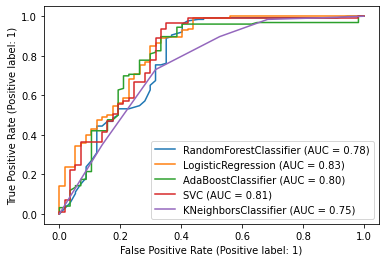

In [117]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,adbc,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

 Based on the above graph and roc_auc_scores, Logistic Regression is the best model for the dataset, with AUC = 0.83 and roc_auc_score = 0.7767

# Hyper Parameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [119]:
parameter = {'C':[0.001,0.01],'penalty':['l1', 'l2'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,3],'solver':['liblinear'],'max_iter':[100,200],'multi_class':['auto']}


In [120]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1,verbose=2)


In [121]:
GridCV.fit(x_train,y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01], 'dual': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [100, 200],
                         'multi_class': ['auto'], 'penalty': ['l1', 'l2'],
                         'random_state': [1, 2, 3], 'solver': ['liblinear']},
             verbose=2)

In [122]:
GridCV.best_params_

{'C': 0.01,
 'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [123]:
Best_mod1 = LogisticRegression(C = 0.01,dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod1.fit(x_train,y_train)
lrpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

85.24590163934425


 Logistic Regression has an accuracy score of 85.24%


In [124]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[ 32,  25],
       [  2, 124]], dtype=int64)

# Saving The Model

In [125]:
import joblib
joblib.dump(Best_mod1,"BestModelLoan.pkl")

['BestModelLoan.pkl']

# Loading The Model

In [126]:
mod=joblib.load("BestModelLoan.pkl")

In [127]:
print(mod.predict(x_test))

[1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1]


In [128]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
41,1,1
142,1,1
85,1,1
561,0,0
413,1,1
520,0,0
230,1,1
8,1,1
78,1,1
498,0,0
